## Laboratorio Estadistica Descriptiva (2023)

Por Ing. Wilson Castro Z.

Actividades en Python complementarias al laboratorio de Estadística descriptiva con Excel y con el Quiz 35 de  [seactuario.com](https://www.seactuario.com), ejecute sus datos con los procedimientos vistos aqui para:

- Realizar los cálculos de Medidas de tendencia central, medidas de apuntamiento, medidas de variabilidad.<br>
- Construir la tabla de frecuencias (con los datos del ejemplo de la guía).<br>
- Construir la tabla de frecuencias para datos agrupados (con los datos del Quiz 35).<br>
- Construir el Histograma y el diagrama de caja y bigotes (con los datos del Quiz 35).



In [1]:
# Ejemplos de estadistica descriptiva con python
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import statistics as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import math as m

In [ ]:
#Si quiere copiar una lista a otra para mantener los valores originales, no se
#puede asignando directamente a otra variable,ej:
w=[3,2,5] # Lista o vector original
z=w #Se asigna supuestamente una copia a la variable z
s=w.copy() #Se asigna realmente una copia a la variable s
y=[] #Se crea una lista vacía y
for i in z:
  i+=2
  print(i,sep=', ')
  y.append(i)
  z[0]=15
print(w,z,s,y)

5
4
7
[15, 2, 5] [15, 2, 5] [3, 2, 5] [5, 4, 7]


In [20]:
# Datos
x=[4,4,4.1,4.3,4.3,4.4,4.4,4.7,4.8,4.8,4.9,5.1,5.3,5.4,5.5,5.6,5.7,
   5.7,5.7,5.7,5.8,5.9,6,6.1,6.1,6.2,6.2,6.9,6.9,7,7.4,7.5,7.7,7.7,
   7.8,8,8,8.1,8.3,8.6,8.6,8.6,8.7,8.9,9.3,9.4,9.8,9.9,9.9,9.9]
xc=x.copy() #Se realiza una copia de la lista anterior

## I. Medidas de Tendencia central

A. Con funciones de librerias<br>
B. Con cálculos o funciones programadas:

In [3]:
# Media
media=np.mean(x)
print(f'Media o promedio = {media}')
# Mediana
mediana=np.median(x)
print(f'Mediana = {mediana}')
# Moda No la tiene numpy, se usa aca stats:
moda=stats.mode(x)
print(f'Moda = {moda}')
# Media Geometrica.Se usa gmean de scipy
from scipy.stats.mstats import gmean
geo=gmean(x)
print(f'Media Geom = {geo}')
#Media armonica:
MH=stats.harmonic_mean(x)
print(f'Media Armonica = {MH}')

Media o promedio = 6.672
Mediana = 6.15
Moda = 5.7
Media Geom = 6.432130448632133
Media Armonica = 6.198573666546474


## B. Con funciones programadas
Por Ing. Wilson Castro Zapata

In [4]:
#Funciones para hallar Medias (por Ing. Wilson Castro)
def mediaA(x):
  media=sum(x)/len(x)
  return media

def mediaP(x,w):
  x,w=np.array(x),np.array(w)
  mediap=np.dot(x,w)
  return mediap

def mediaG(x):
  x=np.array(x)
  MG=np.prod(x)**(1/len(x))
  return MG

def mediaH(x):
  suma=0
  for i in x:
    suma+=1/i
  return len(x)/suma

In [5]:
#Ejecute la celda anterior y ahora esta celda para aplicar las funciones
media=mediaA(x)
mediaPond=mediaP([4,3,2],[0.3,0.3,0.4]) #Con otros datos
mediaG=mediaG(x)
mediaH=mediaH(x)
print(f'Media = {media}')
print(f'Media Ponderada = {mediaPond}')
print(f'Media Geometrica = {mediaG}')
print(f'Media Armonica = {mediaH}')

Media = 6.671999999999998
Media Ponderada = 2.8999999999999995
Media Geometrica = 6.432130448632132
Media Armonica = 6.198573666546474


# Medidas de posición Cuartiles, percentiles, etc

In [7]:
#Cuartiles con la libreria numpy
# Cuartil 1
perc25=np.percentile(x,25)
print(f'Q1 = {perc25}')
q1=np.quantile(x,0.25) #Funcion más general
print(f'Q1 = {q1}')
# Cuartil 2
perc50=np.percentile(x,50)
print(f'Q2 = {perc50}')
q2=np.quantile(x,0.5)
print(f'Q2 = {q2}')
# Cuartil 3 con numpy
perc75=np.percentile(x,75)
print(f'Q3 = {perc75}')
q3=np.quantile(x,0.75)
print(f'Q3 = {q3}')

Q1 = 5.325
Q1 = 5.325
Q2 = 6.15
Q2 = 6.15
Q3 = 8.075
Q3 = 8.075


In [8]:
#Funcion para los cuartiles por Interpolación, por Wilson Castro Zapata
def cuartil(x,q=1):
  n=len(x)
  xs=sorted(x)
  DQ=q*(n+1)/4-1 #Como el indice en python inicia en cero, se resta 1
  Dent=int(DQ)
  Q=xs[Dent]+(DQ-Dent)*(xs[(Dent+1)]-xs[Dent])
  return Q

In [9]:
Q1=cuartil(x,1)
Me=cuartil(x,2)
Q3=cuartil(x,3)
print(f'Q1 = {Q1}')
print(f'Mediana = {Me}')
print(f'Q3 = {Q3}')

Q1 = 5.25
Mediana = 6.15
Q3 = 8.15


In [10]:
# Calculo de las Longitudes máximas teoricas de los bigotes:
Lsup=Q3+1.5*(Q3-Q1)
Linf=Q1-1.5*(Q3-Q1)
print(f'Lsup= {Lsup}\nLinf= {Linf}')

Lsup= 12.5
Linf= 0.8999999999999995


# Medidas de variabilidad

In [11]:
#Rango = mayor - menor
print(f'mayor= {max(x)}, menor= {min(x)}')
rango=max(x)-min(x)
print(f'Rango = {rango}')

# varianza
S2=np.var(x)
# Desviación estandar con numpy
S=np.std(x)
#Desv. estandar con raiz:
import math as m
S_raiz=m.sqrt(S2)

# Coeficiente de variación
cv= ((S)/(media))*100
print(f'Varianza {S2}\nDesv. estandar= {S}\nDesv. estandar  = {S_raiz}')
print(f'C.V. = {cv}%')

mayor= 9.9, menor= 4
Rango = 5.9
Varianza 3.206816
Desv. estandar= 1.7907584985139677
Desv. estandar  = 1.7907584985139677
C.V. = 26.839905553266913%


##Medidas de forma y concentración

In [ ]:
#Coeficiente de Asimetria
from scipy.stats import skew,kurtosis
print(f'Coef. asimetria = {skew(x)}')

#Curtosis
print(f'Curtosis = {kurtosis(x)}')

Coef. asimetria = 0.7809228212747752
Curtosis = 1.729214257861373


# Tabla de Frecuencias:

n: Frecuencia absoluta (total datos en cada valor de X)<br>
N: Frecuencia absoluta acumulada (total datos  acumulado hasta el valor de X)<br>
f: Frecuencia relativa en porcentaje.<br>
F: Frecuencia relativa acumulada en porcentaje.

In [12]:
data=pd.Series(x)
n=data.value_counts(sort=False)
N=n.cumsum()
f=100*data.value_counts(sort=False)/len(data)
F=100*f.cumsum()/f.sum()

In [13]:
#Crear el diccionario y el dataframe de la tabla de frecuencias
tablafrec={'n':n,'N':N,'f(%)':f,'F(%)':F}
df1 = pd.DataFrame(tablafrec,columns=['n','N','f(%)','F(%)'])
print(df1)

     n   N  f(%)   F(%)
4.0  2   2   4.0    4.0
4.1  1   3   2.0    6.0
4.3  2   5   4.0   10.0
4.4  2   7   4.0   14.0
4.7  1   8   2.0   16.0
4.8  2  10   4.0   20.0
4.9  1  11   2.0   22.0
5.1  1  12   2.0   24.0
5.3  1  13   2.0   26.0
5.4  1  14   2.0   28.0
5.5  1  15   2.0   30.0
5.6  1  16   2.0   32.0
5.7  4  20   8.0   40.0
5.8  1  21   2.0   42.0
5.9  1  22   2.0   44.0
6.0  1  23   2.0   46.0
6.1  2  25   4.0   50.0
6.2  2  27   4.0   54.0
6.9  2  29   4.0   58.0
7.0  1  30   2.0   60.0
7.4  1  31   2.0   62.0
7.5  1  32   2.0   64.0
7.7  2  34   4.0   68.0
7.8  1  35   2.0   70.0
8.0  2  37   4.0   74.0
8.1  1  38   2.0   76.0
8.3  1  39   2.0   78.0
8.6  3  42   6.0   84.0
8.7  1  43   2.0   86.0
8.9  1  44   2.0   88.0
9.3  1  45   2.0   90.0
9.4  1  46   2.0   92.0
9.8  1  47   2.0   94.0
9.9  3  50   6.0  100.0


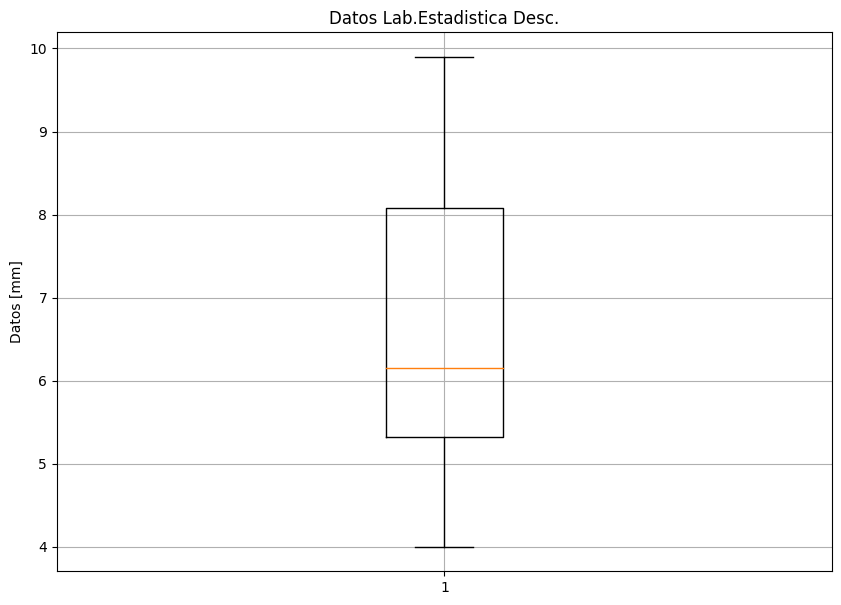

In [16]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(x)
plt.title("Datos Lab.Estadistica Desc.")
plt.grid()
plt.ylabel('Datos [mm]')
# show plot
plt.show()

## Uso de pandas y resumen de estadísticos

Se requiere convertir los datos en un Dataframe, que es una estructura de datos que puede contener varias columnas cada una con diferentes tipo de datos. El comando es:

df = pd.DataFrame(data=d)

In [17]:
df = pd.DataFrame(data=x)
df.head(5)

0
0  4.0
1  4.0
2  4.1
3  4.3
4  4.3

In [18]:
#Resumen de estadísticos:
df.describe()

0
count  50.000000
mean    6.672000
std     1.808939
min     4.000000
25%     5.325000
50%     6.150000
75%     8.075000
max     9.900000

In [19]:
#Se púede hacer con varios percentiles:
percentiles = df.describe(percentiles = [.1, .15, .33, .5, .592, .85, .9])
percentiles

0
count  50.000000
mean    6.672000
std     1.808939
min     4.000000
10%     4.390000
15%     4.735000
33%     5.700000
50%     6.150000
59.2%   7.003200
85%     8.665000
90%     9.310000
max     9.900000

## Crear la tabla de Frecuencias de datos agrupados

In [21]:
#Ejemplo con los datos de los residentes de un edificio (seactuario.com)
import pandas as pd
df = pd.DataFrame(data=x,columns=['X'])
print(f'Datos tipo x = {type(x)}, datos tipo df= {type(df)}')

Datos tipo x = <class 'list'>, datos tipo df= <class 'pandas.core.frame.DataFrame'>


In [32]:
#Se definen las clases (Tome una décima antes del Dato mínimo):
bins=[3.9,4.9,5.8,6.7,7.6,8.5,9.4,10.3]
labels=['4.0 - 4.9','4.9 - 5.8','5.8 - 6.7','6.7 -7.6','7.6 - 8.5','8.5 - 9.4','9.4 - 10.3']

In [33]:
df['Clases']=pd.cut(df['X'],bins,labels=labels)

In [34]:
tabla2=pd.crosstab(index=df['Clases'],columns='n')
tabla2

col_0        n
Clases        
4.0 - 4.9   11
4.9 - 5.8   10
5.8 - 6.7    6
6.7 -7.6     5
7.6 - 8.5    7
8.5 - 9.4    7
9.4 - 10.3   4

In [35]:
tabla2['N']=tabla2['n'].cumsum()
tabla2['f']=100*tabla2['n']/sum(tabla2['n'])
tabla2['F']=tabla2['f'].cumsum()
tabla2

col_0        n   N     f      F
Clases                         
4.0 - 4.9   11  11  22.0   22.0
4.9 - 5.8   10  21  20.0   42.0
5.8 - 6.7    6  27  12.0   54.0
6.7 -7.6     5  32  10.0   64.0
7.6 - 8.5    7  39  14.0   78.0
8.5 - 9.4    7  46  14.0   92.0
9.4 - 10.3   4  50   8.0  100.0

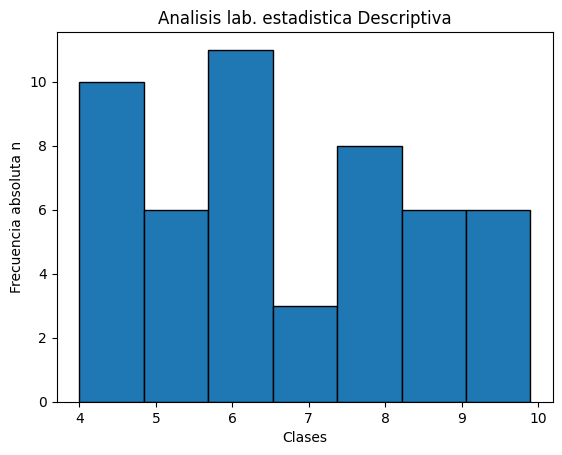

In [47]:
from numpy.ma import log10
# Histograma
NoClases=int(1+3.3*log10(len(x)))
plt.hist(x, bins='sturges',edgecolor='black') #linewidth=0.9
plt.title('Analisis lab. estadistica Descriptiva')
plt.ylabel('Frecuencia absoluta n')
plt.xlabel('Clases')
plt.show()